## How to have a practical approach to an LDA model?

Consider a situation where you have plotted the relationship between two variables where each color represents a different class. One is shown with a red color and the other with blue.

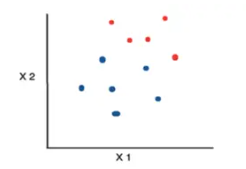

If you are willing to reduce the number of dimensions to 1, you can just project everything to the x-axis as shown below:

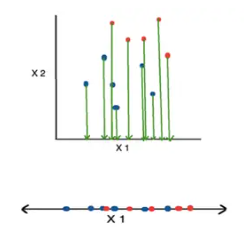

This approach neglects any helpful information provided by the second feature. However, you can use LDA to plot it. The advantage of LDA is that it uses information from both the features to create a new axis which in turn minimizes the variance and maximizes the class distance of the two variables.

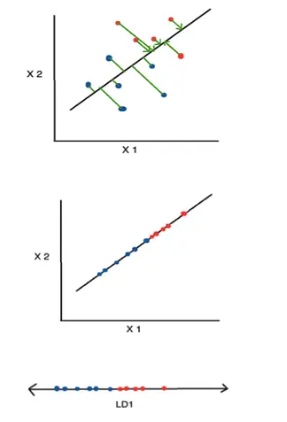

### How does LDA work?
LDA focuses primarily on projecting the features in higher dimension space to lower dimensions. You can achieve this in three steps:

- Firstly, you need to calculate the separability between classes which is the distance between the mean of different classes. This is called the between-class variance.

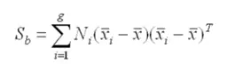

- Secondly, calculate the distance between the mean and sample of each class. It is also called the within-class variance.

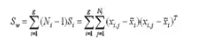

- Finally, construct the lower-dimensional space which maximizes the between-class variance and minimizes the within-class variance. P is considered as the lower-dimensional space projection, also called Fisher’s criterion.

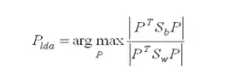

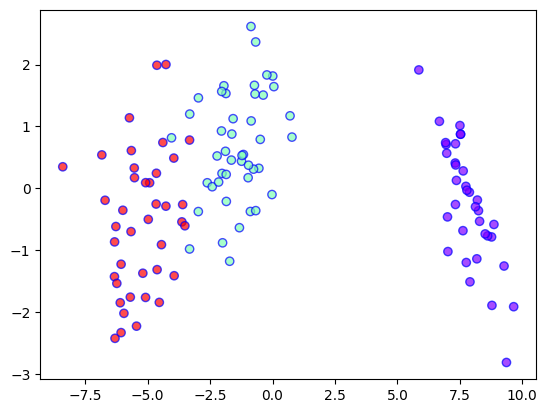

In [1]:
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
 
# read dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=cls)
 
# divide the dataset into class and target variable
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values
 
# Preprocess the dataset and divide into train and test
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
 
# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
 
# plot the scatterplot
plt.scatter(
    X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)